In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

data = pd.read_csv('../data/data_cleaned.csv')

In [33]:
data.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_movie,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",True,90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",False,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,False,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,True,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",True,125
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,1 Season,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,False,0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,True,104


In [34]:
with open('variables.pkl', 'rb') as f:
    variables = pickle.load(f)

country_with_most_mvtv = variables['country_with_most_mvtv']

# Visualisation des Données

### Histogramme de la répartition des années de sortie des films et séries.

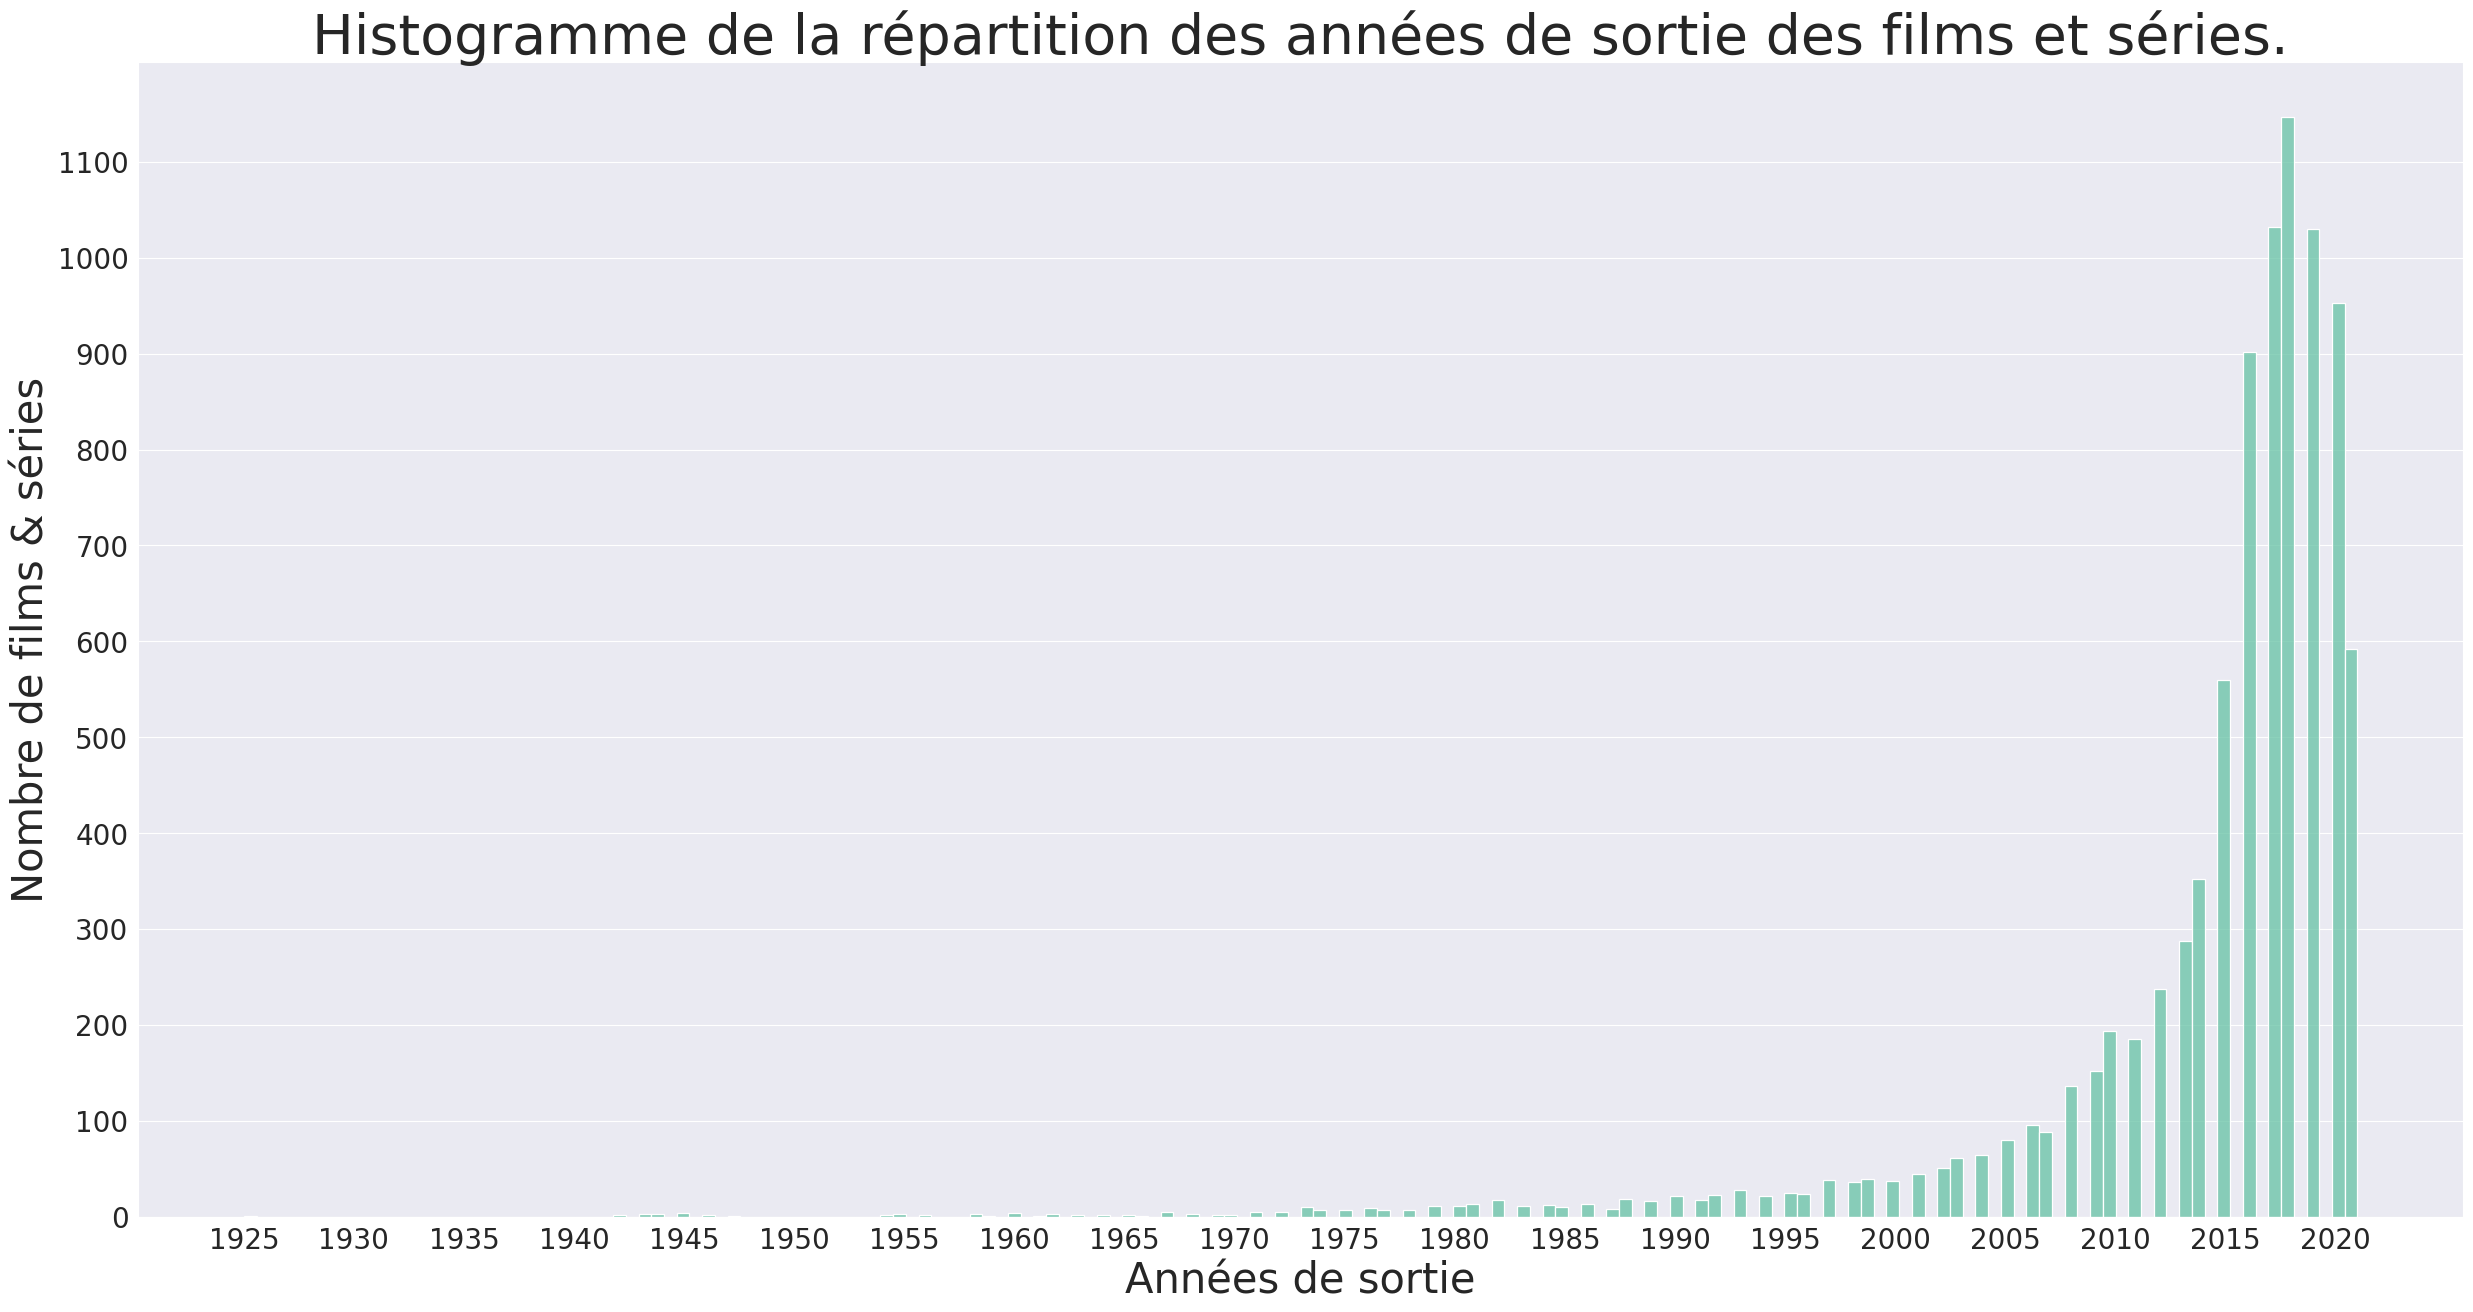

In [35]:
plt.figure(figsize=(30, 15))
plt.grid(axis='x')

plt.xticks(np.arange(1925, 2025, 5), fontsize=20)
plt.yticks(np.arange(0, 1200, 100), fontsize=20)

plt.title('Histogramme de la répartition des années de sortie des films et séries.', fontsize=40)
plt.xlabel("Années de sortie", fontsize=30)
plt.ylabel("Nombre de films & séries", fontsize=30)

sns.histplot(data=data['release_year'])
plt.show()

### Graphique en barres du top 10 des pays ayant le plus de contenus

/tmp/ipykernel_23705/3858156048.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i,y[i],y[i], horizontalalignment='center', verticalalignment='bottom', fontsize=20)


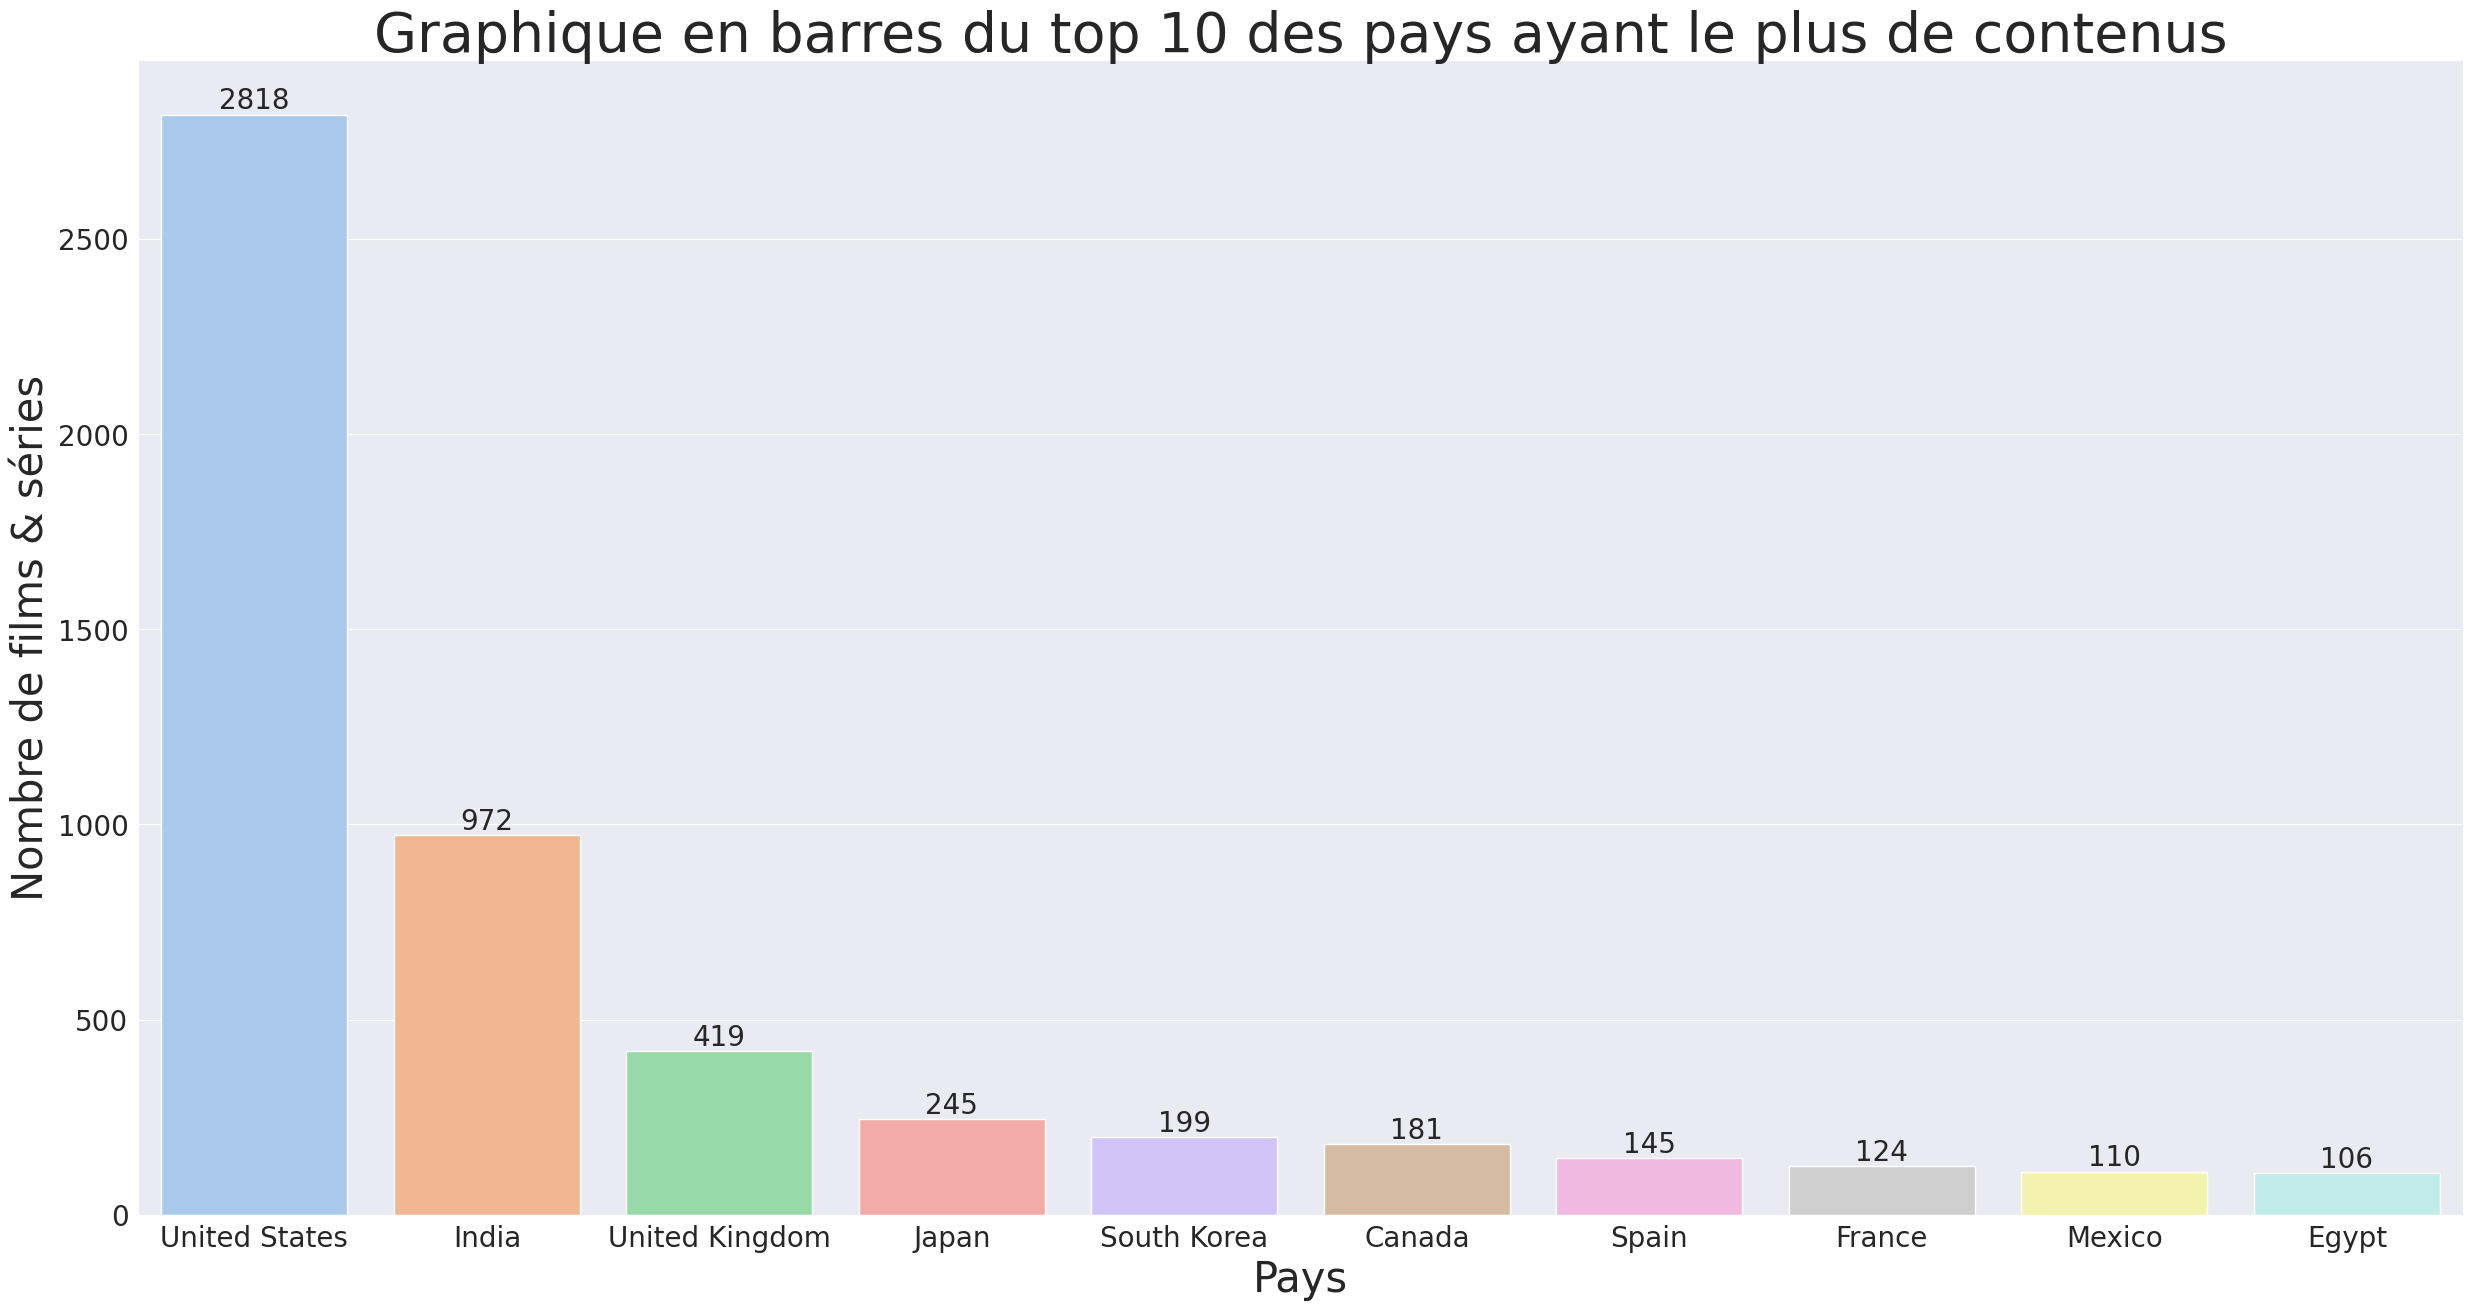

In [36]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment='center', verticalalignment='bottom', fontsize=20)

plt.figure(figsize=(30, 15))
plt.grid(axis='x')

add_labels(country_with_most_mvtv.index, country_with_most_mvtv['count'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Graphique en barres du top 10 des pays ayant le plus de contenus', fontsize=40)
plt.xlabel("Pays", fontsize=30)
plt.ylabel("Nombre de films & séries", fontsize=30)

sns.barplot(data=country_with_most_mvtv, x='country', y='count', palette='pastel', hue='country')
plt.show()

### Pie chart de la répartition des types de classification d'âge

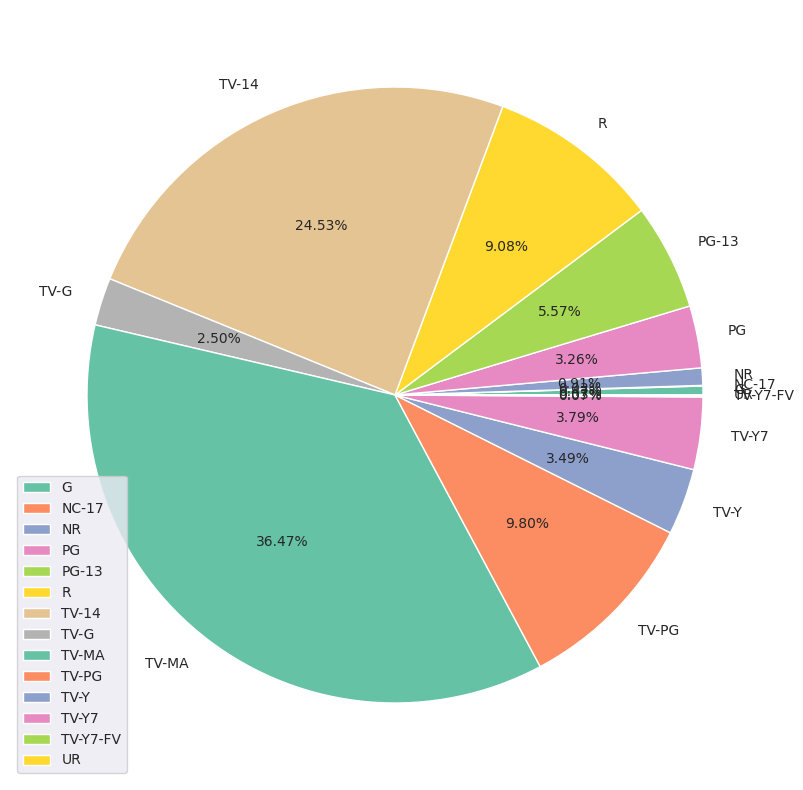

In [37]:
repartition_by_rating = data.groupby('rating').agg(total=('show_id', 'count'))
repartition_by_rating = repartition_by_rating.reset_index()
for char in ['66 min', '74 min', '84 min']:
    repartition_by_rating = repartition_by_rating.loc[repartition_by_rating['rating']!= char , ]
repartition_by_rating['total'] = repartition_by_rating['total'] * 100 / repartition_by_rating['total'].sum()
repartition_by_rating.rename(columns={'total':'frequence'}, inplace=True)


plt.figure(figsize=(15, 10))
plt.xticks(fontsize=20)
palette = sns.color_palette(palette='Set2')
sns.set_palette( palette=palette)

plt.pie(labels=repartition_by_rating['rating'], x=repartition_by_rating['frequence'], autopct='%.2f%%')
plt.legend()
plt.show()

### Un graphique en barres montrant le nombre de films/séries par catégorie.

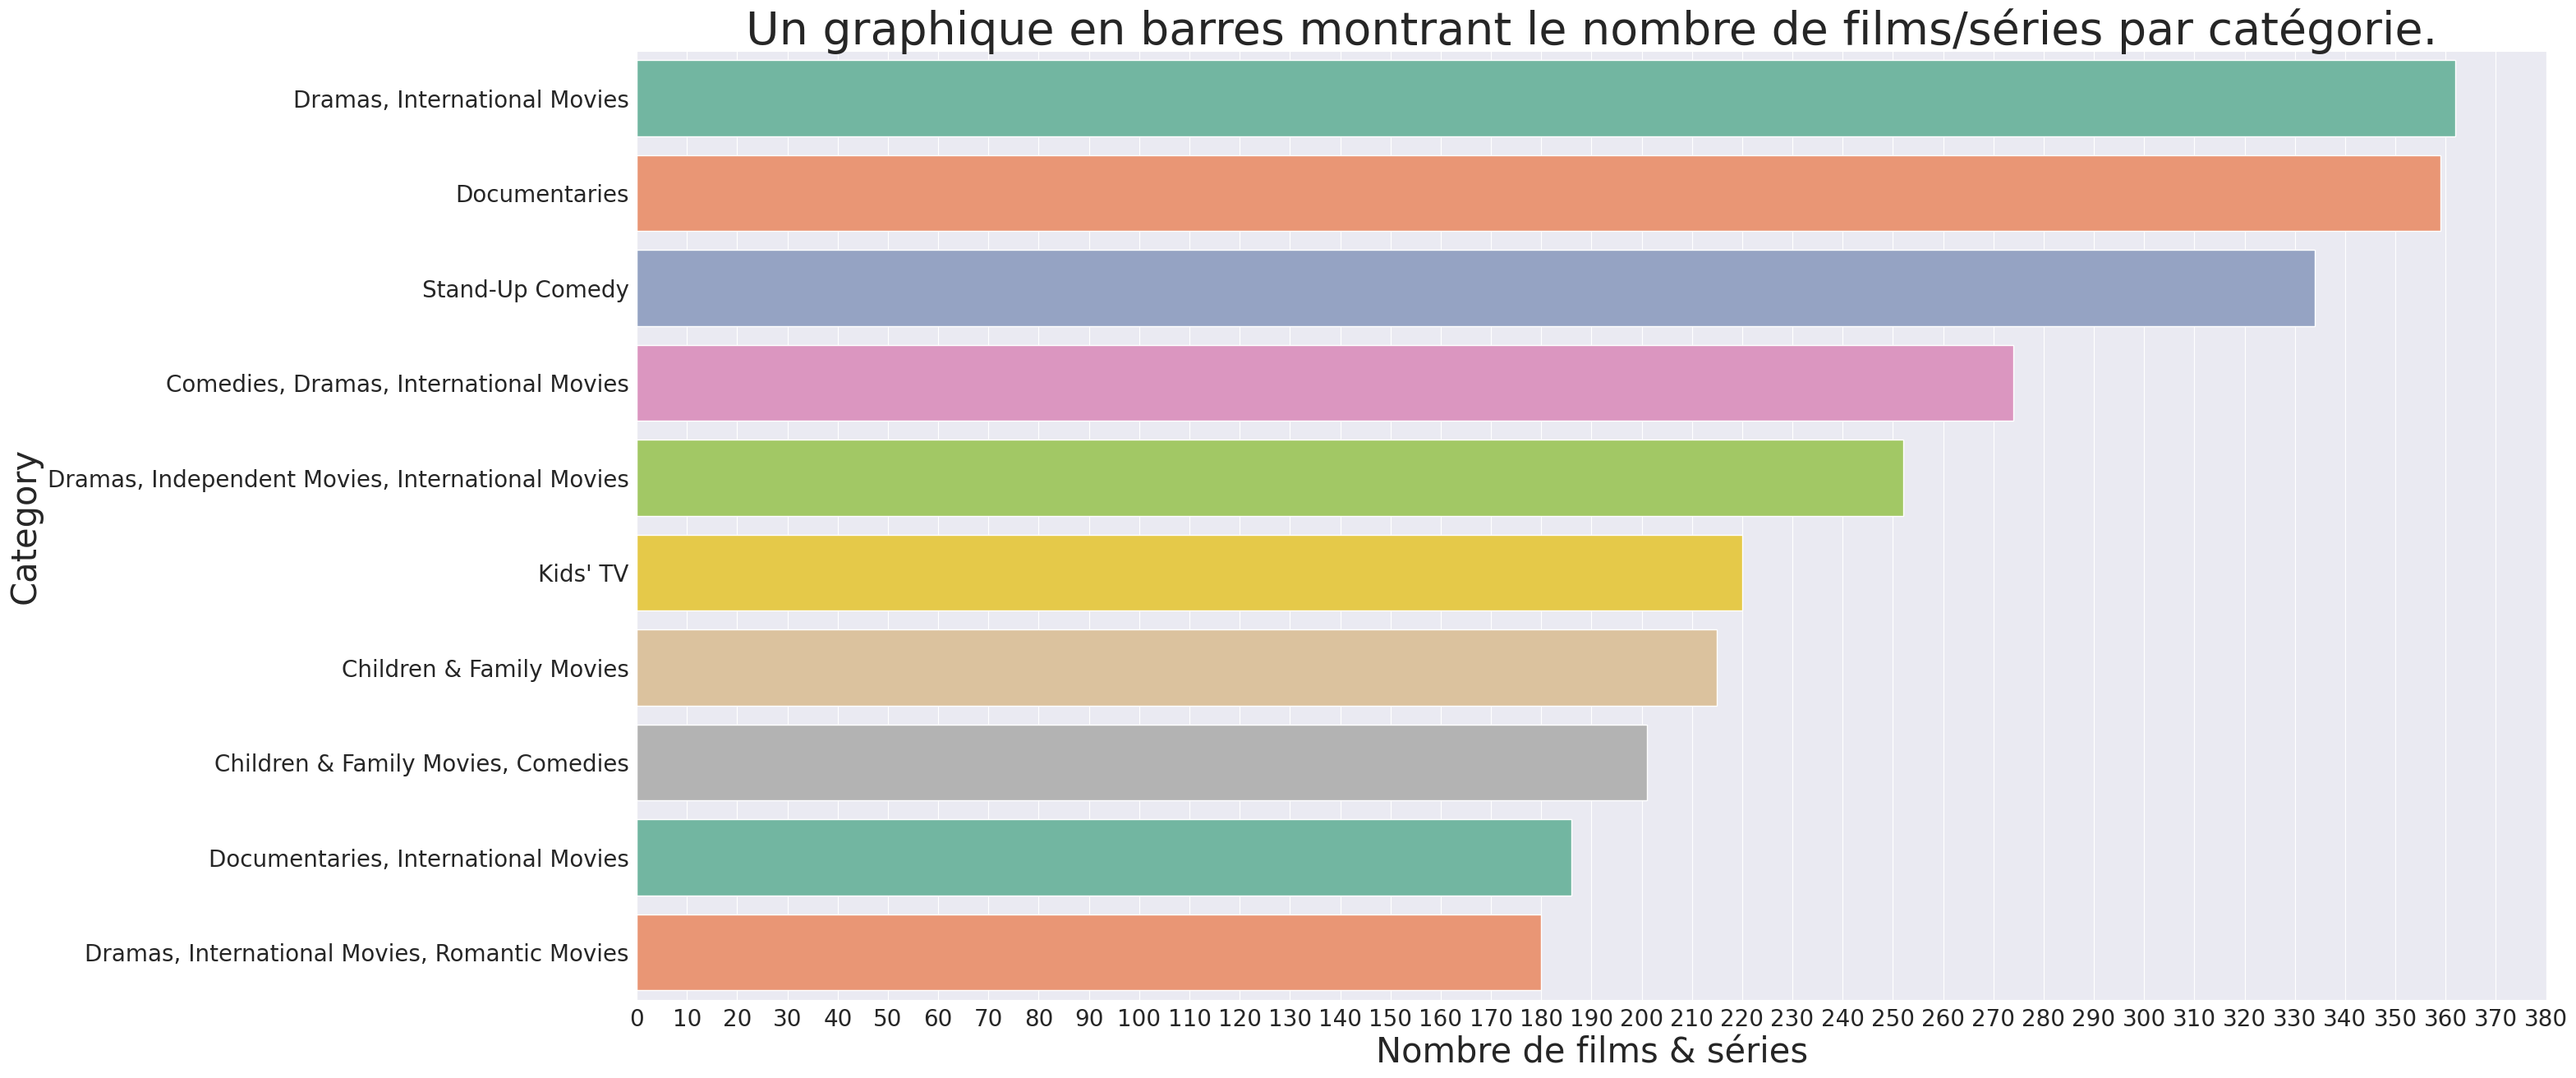

In [38]:
nbr_mvtv_by_category = data.groupby('listed_in').agg(total=('show_id', 'count'))
nbr_mvtv_by_category = nbr_mvtv_by_category.reset_index()
nbr_mvtv_by_category.sort_values('total', ascending=False, inplace=True)
nbr_mvtv_by_category = nbr_mvtv_by_category.iloc[:10, :]

plt.figure(figsize=(30, 15))
plt.grid(axis='y')

plt.xticks(np.arange(0, 400, 10), fontsize=20)
plt.yticks(fontsize=20)

plt.title("Un graphique en barres montrant le nombre de films/séries par catégorie.", fontsize=40)
plt.xlabel('Nombre de films & séries', fontsize=30)
plt.ylabel('Category', fontsize=30)

sns.barplot(data=nbr_mvtv_by_category, x='total', y='listed_in', palette='Set2', hue='listed_in')
plt.show()

### Un scatterplot de la durée des films en fonction de leur année de sortie.

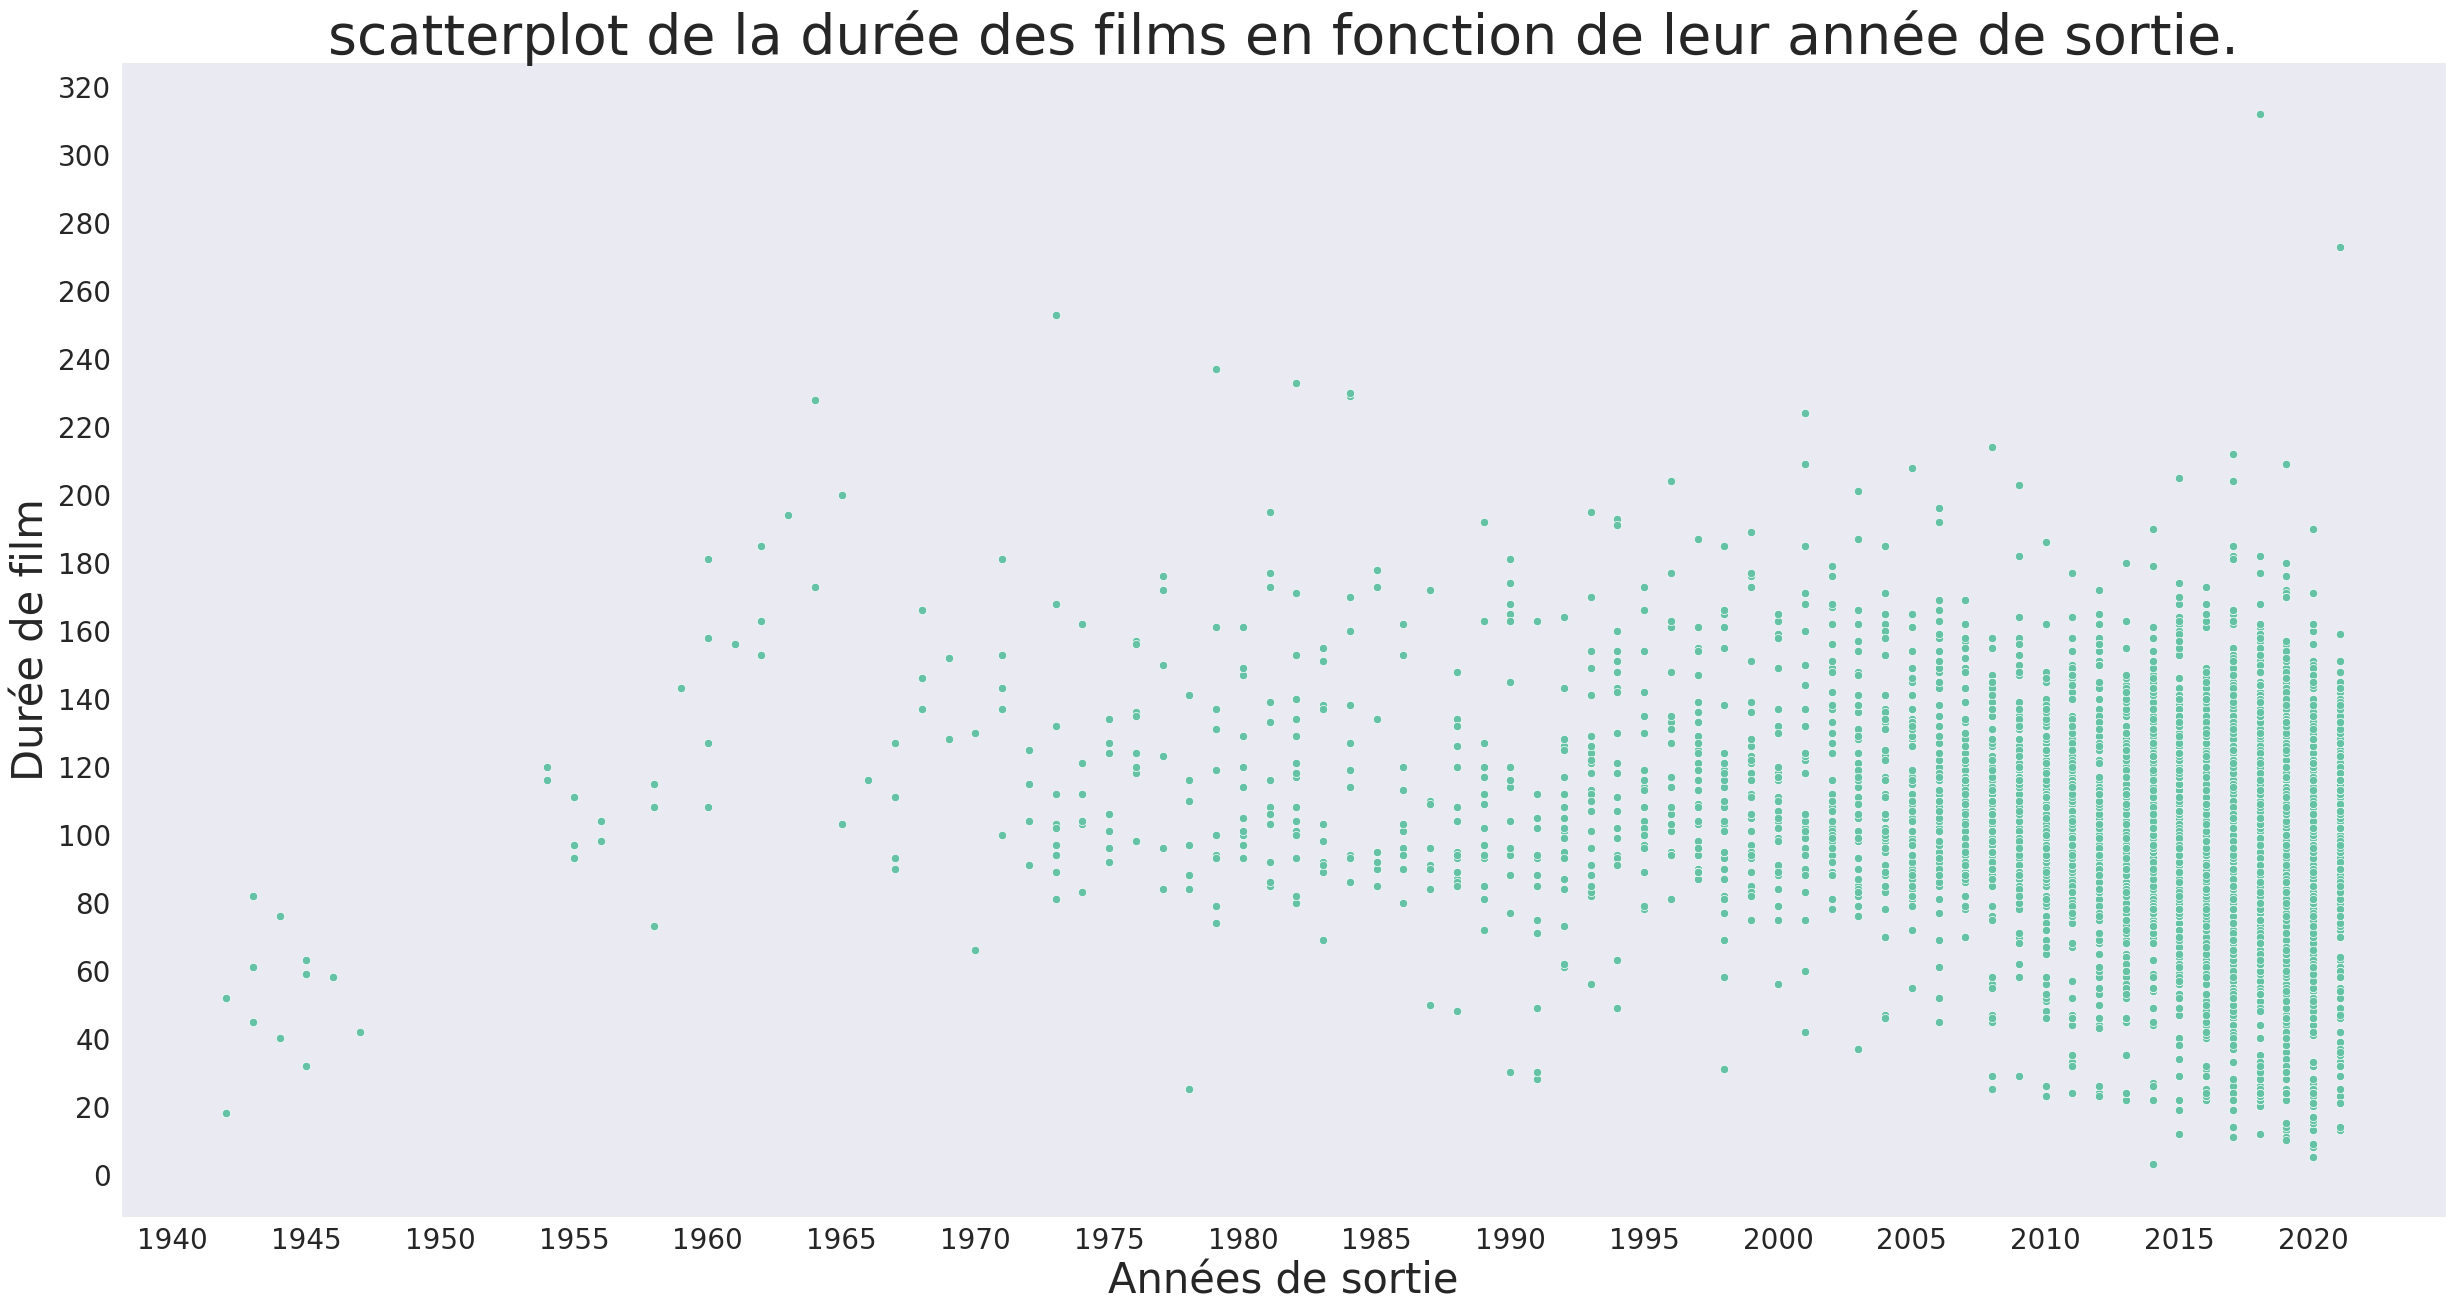

In [39]:
plt.figure(figsize=(30, 15))
plt.grid()

plt.xticks(np.arange(1925, 2025, 5), fontsize=20)
plt.yticks(np.arange(0, 400, 20), fontsize=20)

plt.title("scatterplot de la durée des films en fonction de leur année de sortie.", fontsize=40)
plt.xlabel('Années de sortie', fontsize=30)
plt.ylabel('Durée de film', fontsize=30)

sns.scatterplot(data=data, x='release_year', y=data.loc[data['is_movie'], 'duration_minutes'])
plt.show()

### Graphique en courbe montrant l'évolution du nombre de contenus ajoutés sur Netflix au fil des ans.

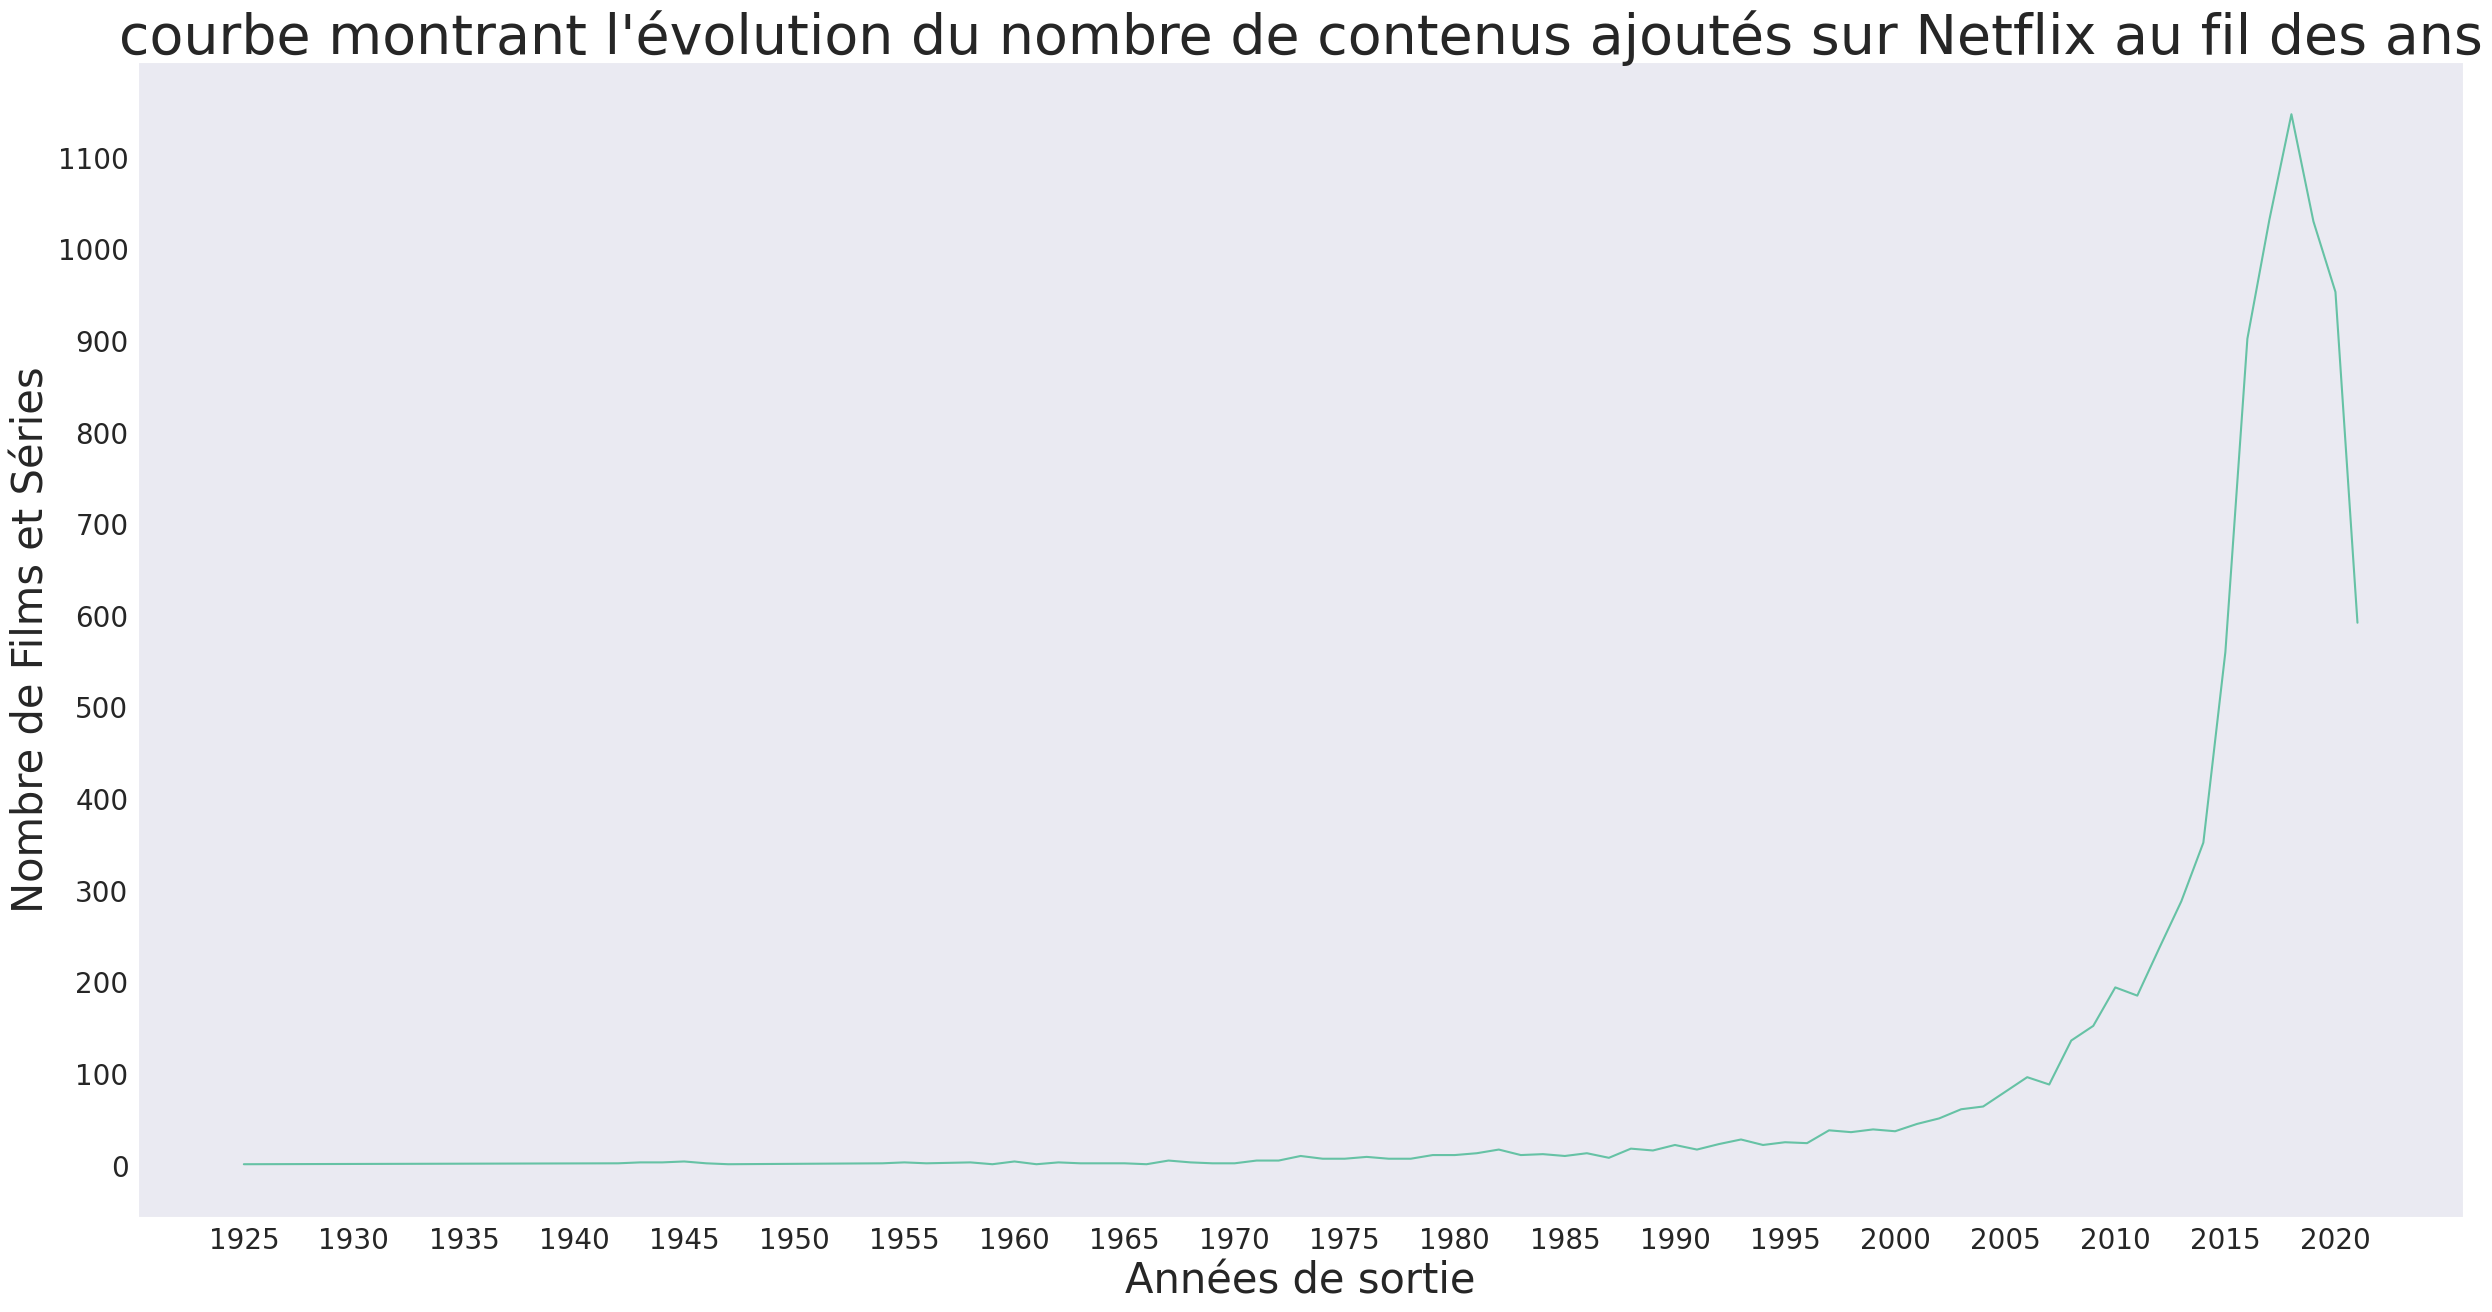

In [40]:
count_mvtv_by_year = data.groupby('release_year').agg(total=('show_id', 'count'))
count_mvtv_by_year = count_mvtv_by_year.reset_index()

plt.figure(figsize=(30, 15))
plt.grid()

plt.xticks(np.arange(1925, 2025, 5), fontsize=20)
plt.yticks(np.arange(0, 1200, 100), fontsize=20)

plt.title("courbe montrant l'évolution du nombre de contenus ajoutés sur Netflix au fil des ans", fontsize=40)
plt.xlabel('Années de sortie', fontsize=30)
plt.ylabel('Nombre de Films et Séries', fontsize=30)

sns.lineplot(data=count_mvtv_by_year, x='release_year', y='total')
plt.show()

### Boxplot de la durée des films en fonction de leur classification d'âge.

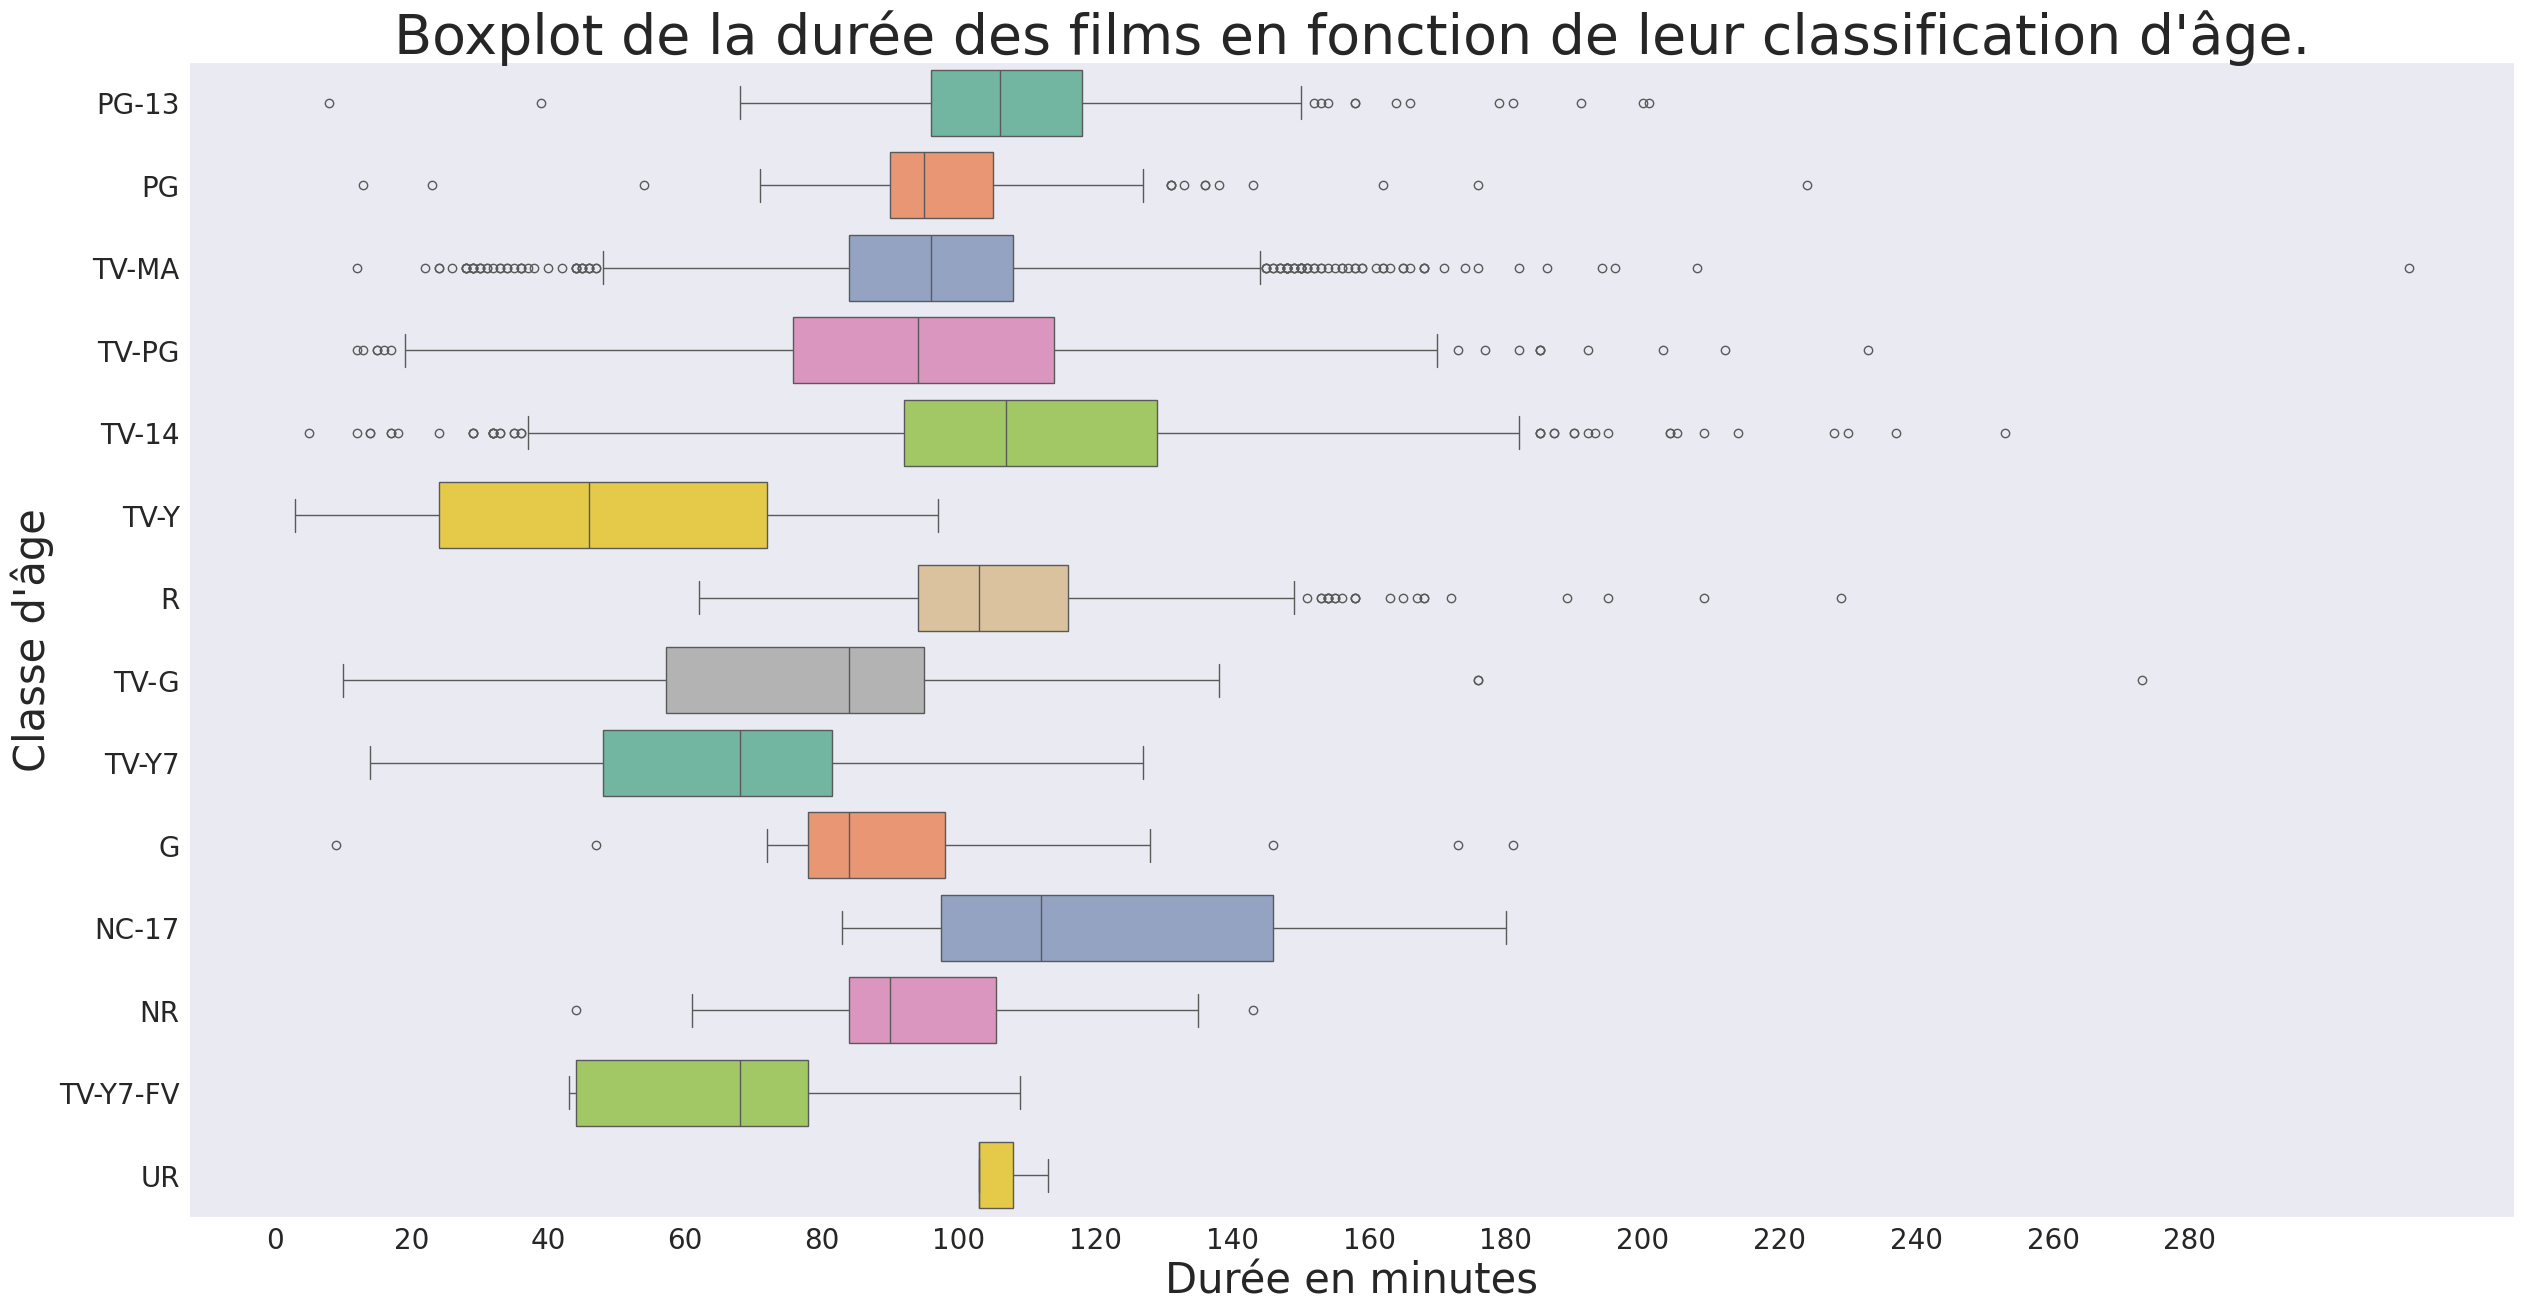

In [41]:
is_movie = data.loc[data['is_movie'], ]
for char in ['66 min', '74 min', '84 min']:
    is_movie = is_movie.loc[is_movie['rating']!= char , ]


plt.figure(figsize=(30, 15))
plt.grid()

plt.xticks(np.arange(0, 300, 20), fontsize=20)
plt.yticks(fontsize=20)

plt.title("Boxplot de la durée des films en fonction de leur classification d'âge.", fontsize=40)
plt.xlabel('Durée en minutes', fontsize=30)
plt.ylabel("Classe d'âge", fontsize=30)

sns.boxplot(data=is_movie, x='duration_minutes', y='rating', palette='Set2', hue='rating')
plt.show()

In [45]:
nbr_mvtv_by_category

,listed_in,total
326,"Dramas, International Movies",362
274,Documentaries,359
470,Stand-Up Comedy,334
200,"Comedies, Dramas, International Movies",274
319,"Dramas, Independent Movies, International Movies",252
422,Kids' TV,220
121,Children & Family Movies,215
125,"Children & Family Movies, Comedies",201
281,"Documentaries, International Movies",186
329,"Dramas, International Movies, Romantic Movies",180
